In [ ]:
!nvidia-smi

Wed Dec  6 20:47:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
import ultralytics

import glob
from IPython.display import Image, display

ultralytics.checks()

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.9/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
import tensorboard

In [ ]:
!ls /content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO/data

data.yaml  test  train	val


In [ ]:
%cd /content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO

/content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO


In [ ]:
!tensorboard --logdir /content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO/runs/detect/train

2023-12-06 20:55:23.605873: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 20:55:23.605931: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 20:55:23.605978: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.1 at http://localhost:6006/ (Press CTRL+C to quit)


In [ ]:
%cd /content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO

!yolo task=detect mode=train model=yolov8m.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Data298AandB/YOLO
100% 49.7M/49.7M [00:00<00:00, 268MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classe

In [ ]:
!ls /content/drive/MyDrive/Data298AandB/YOLO_Modeling/YOLO/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1699913476.43ee1711bdbe.3337.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


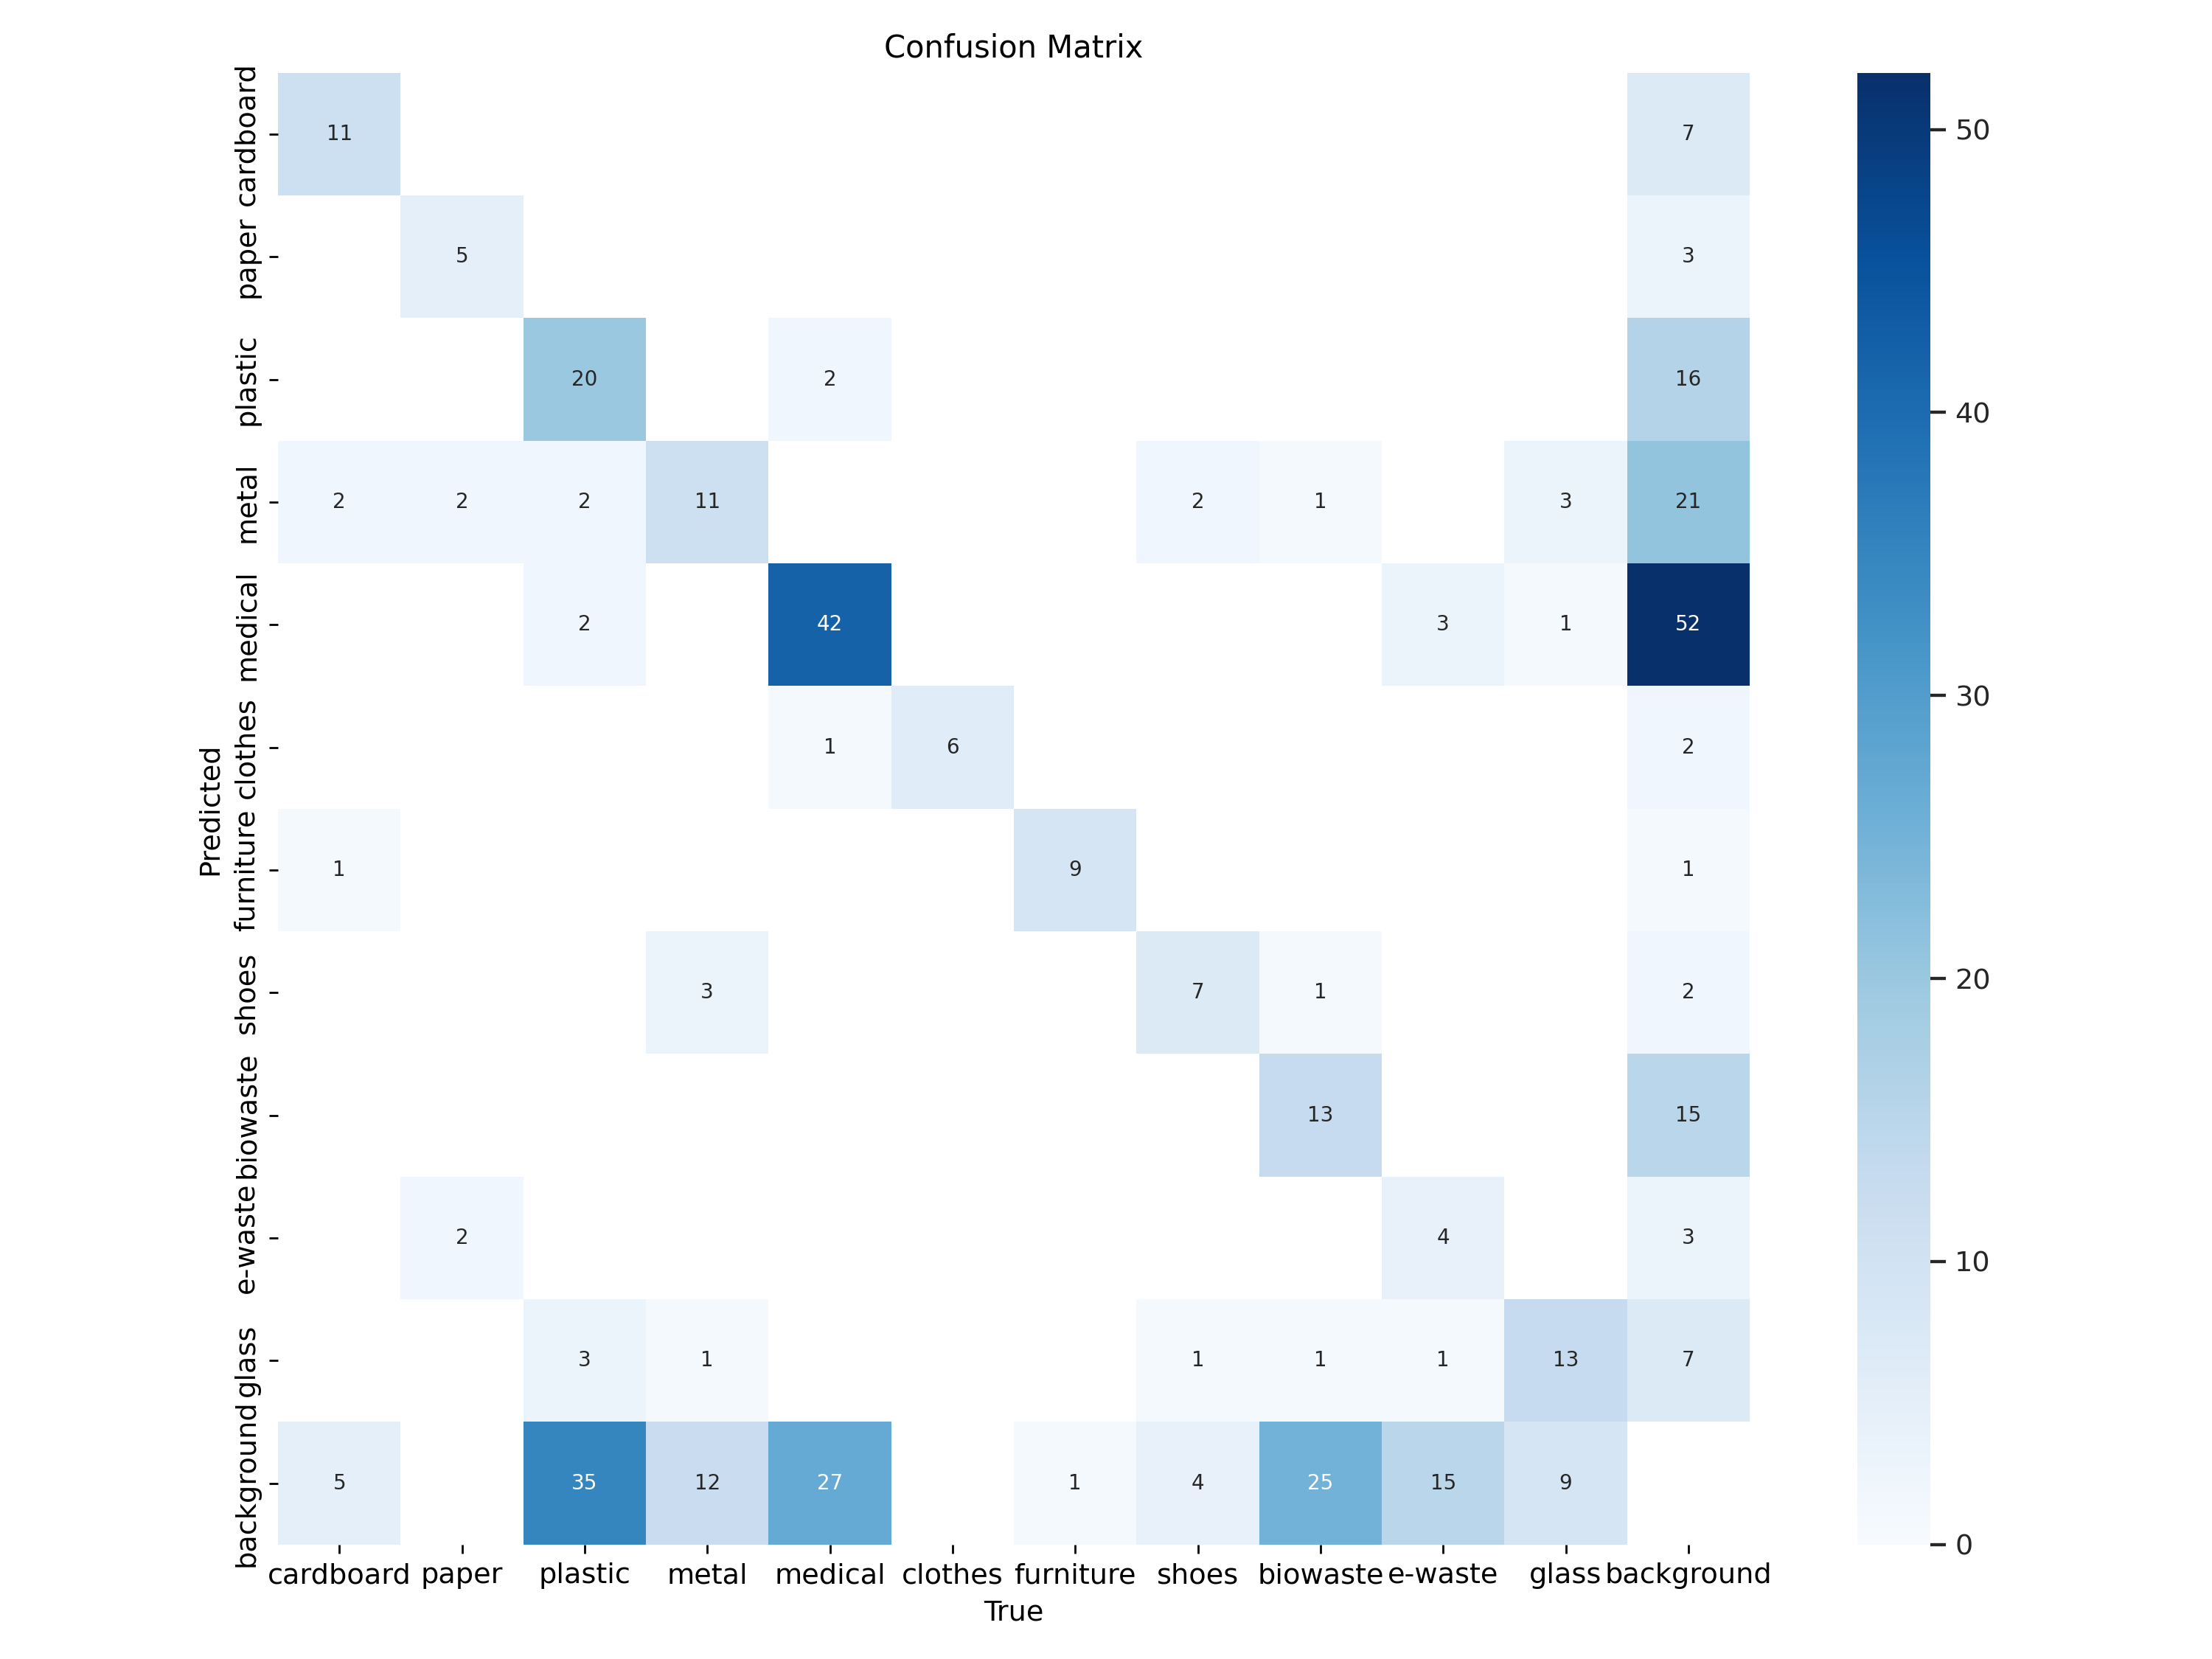

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=1000)


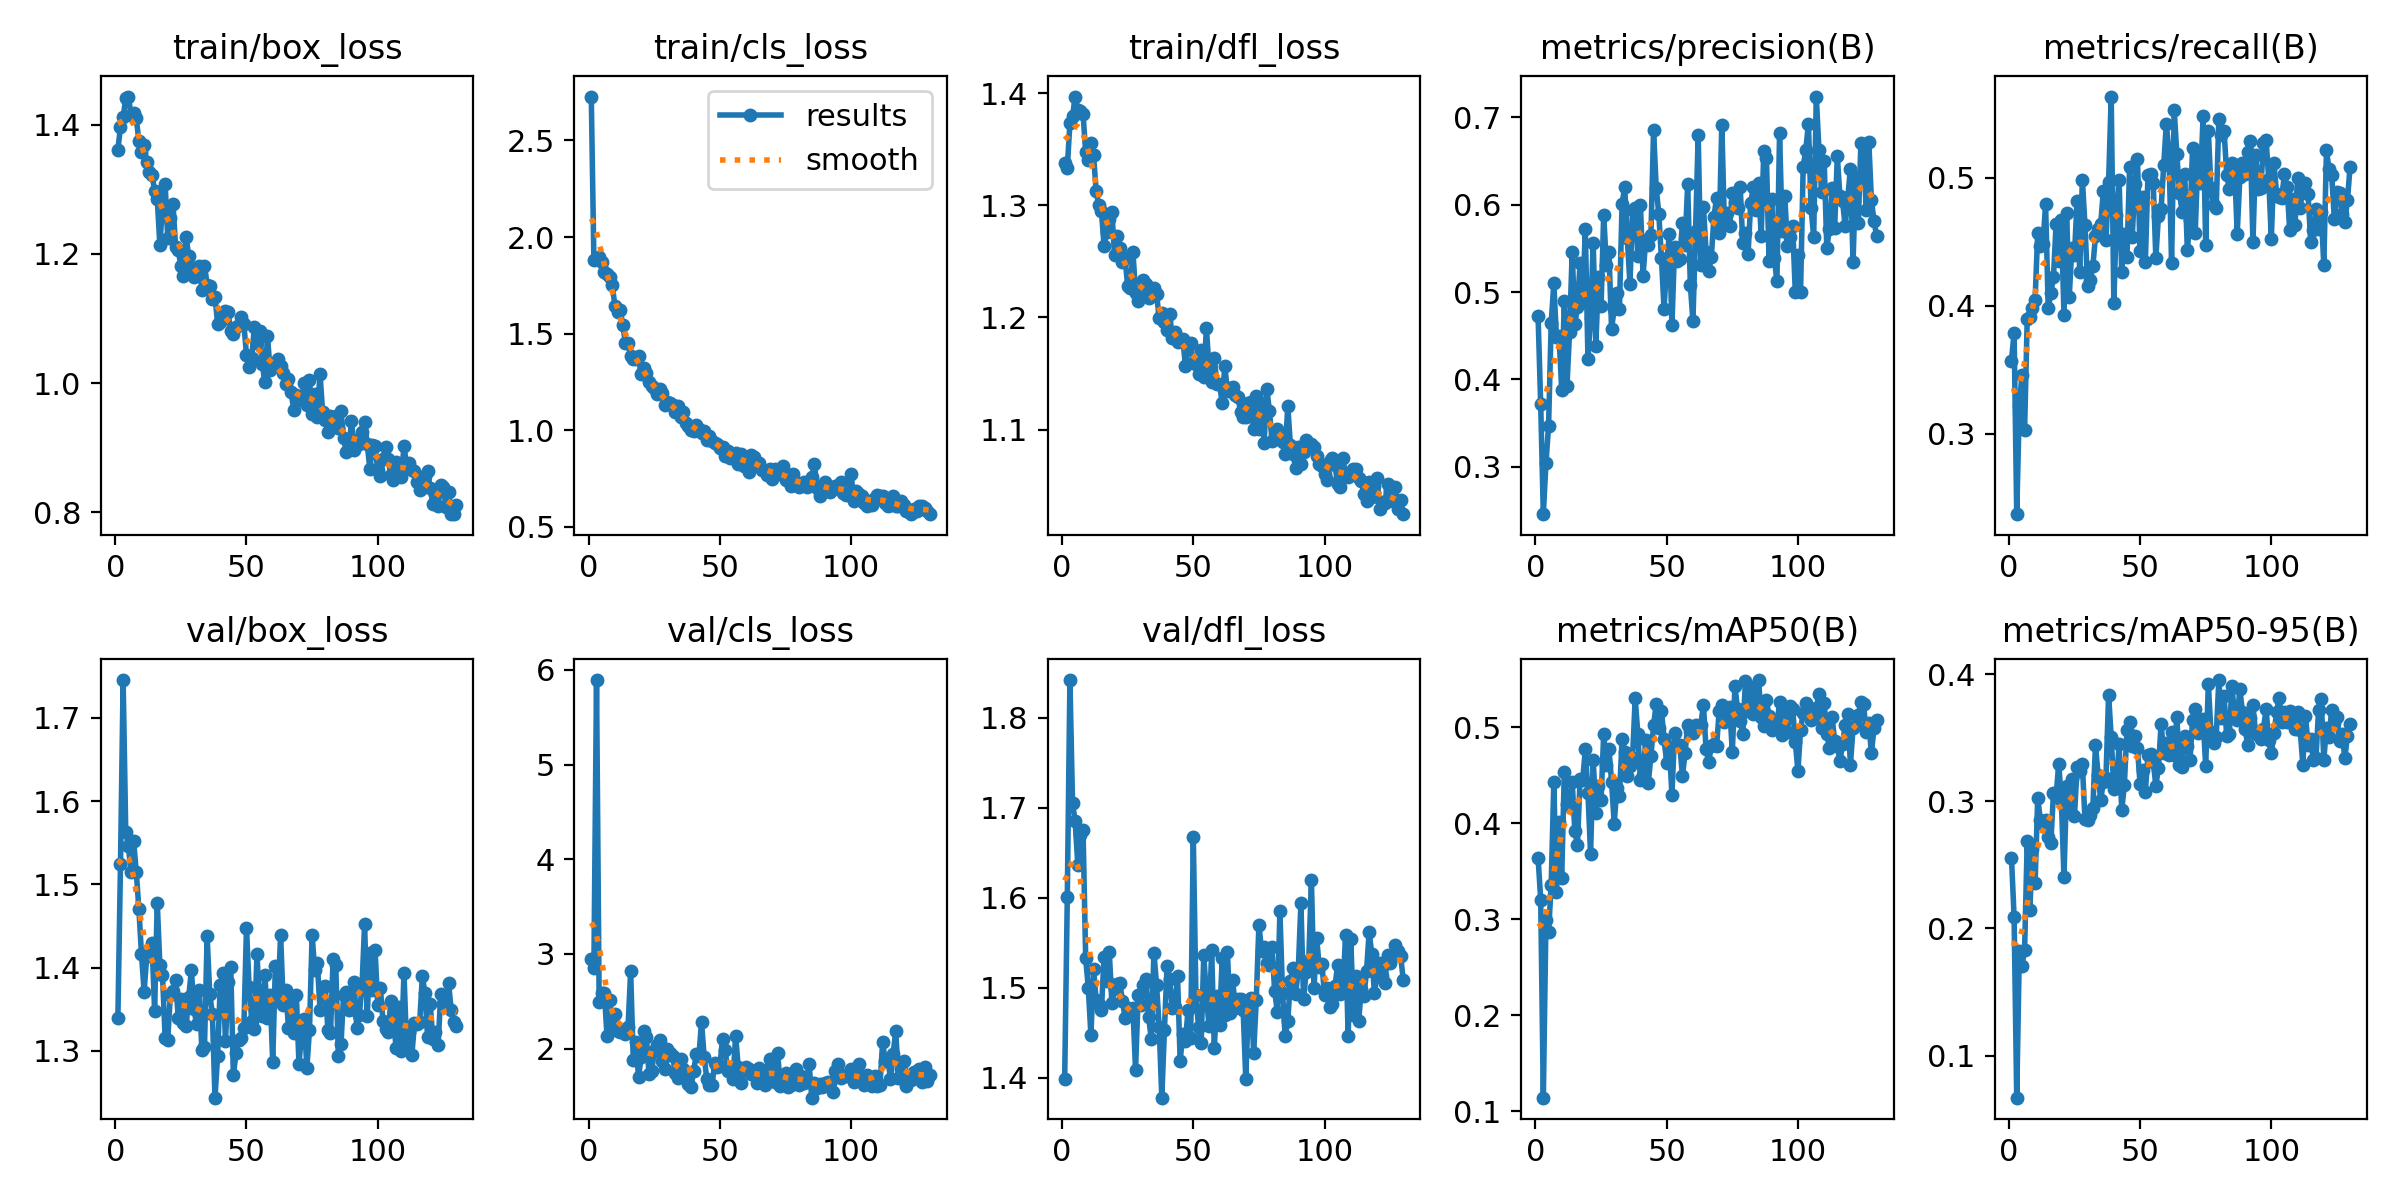

In [ ]:
Image(filename='runs/detect/train/results.png', width=800)


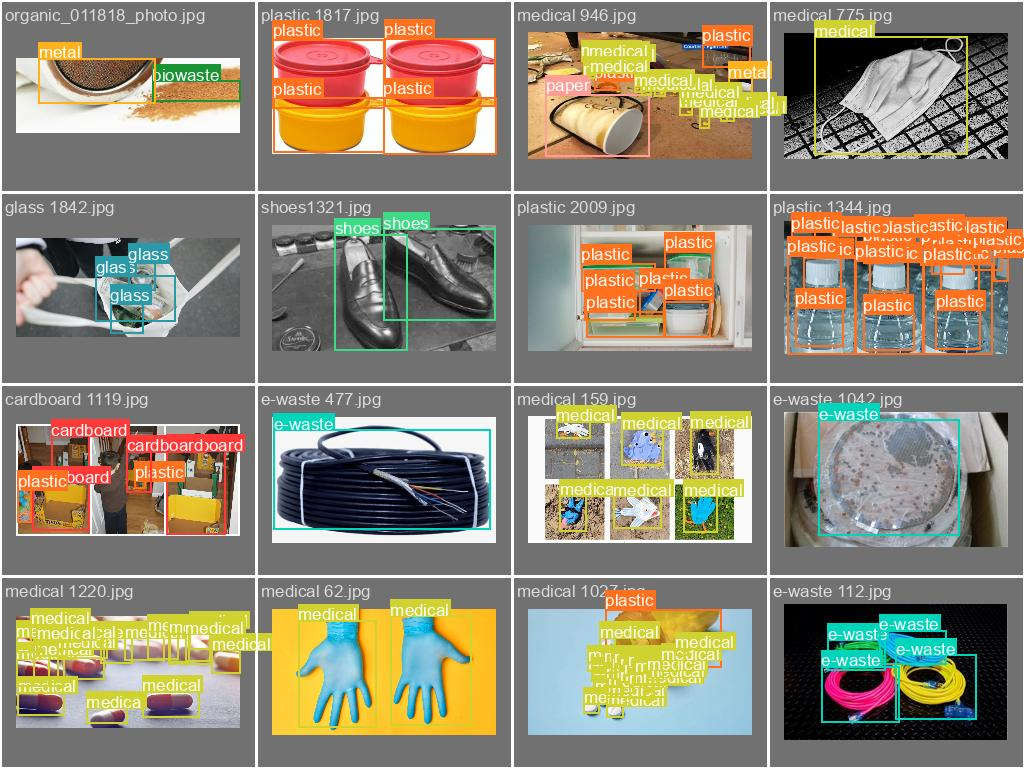

In [ ]:
Image(filename='runs/detect/train/val_batch0_labels.jpg', width=600)


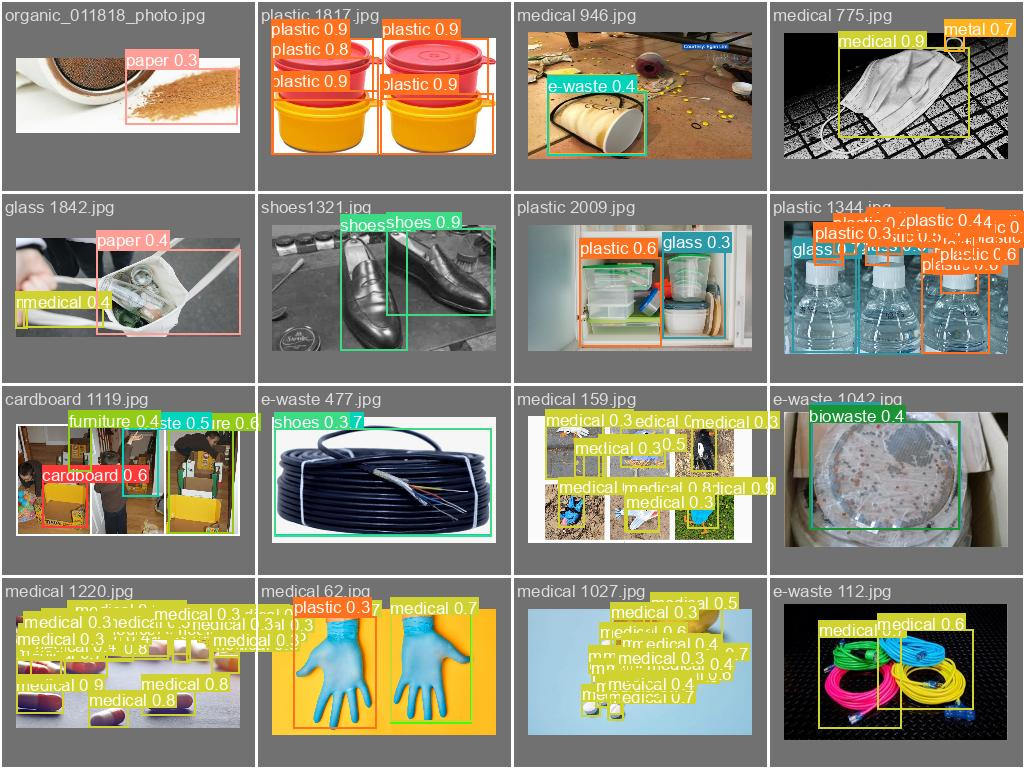

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)


In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml


Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Data298AandB/YOLO/data/val/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.69it/s]
                   all        100        309      0.588      0.581       0.56      0.398
             cardboard        100         19      0.771      0.526       0.73      0.464
                 paper        100          9      0.432      0.556      0.431      0.349
               plastic        100         62      0.671      0.371      0.384      0.215
                 metal        100         27      0.456      0.444      0.466      0.299
               medical        100         72      0.654      0.444      0.446      0.234
            

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images save=True


Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs

image 1/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/Chair--8-_jpg.rf.87c0e2de5d6087044376d78ef0cdf4f4.jpg: 224x224 1 furniture, 9.4ms
image 2/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/Sofa--157-_jpg.rf.5f5e8eb918140ba153e1bf10e78184e4.jpg: 224x224 2 furnitures, 9.8ms
image 3/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/Sofa--271-_jpg.rf.3561c35de4a92445b0e237401fc70edd.jpg: 224x224 1 furniture, 9.4ms
image 4/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/cardboard 2086.jpg: 160x224 1 cardboard, 119.3ms
image 5/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/cardboard 369.jpg: 224x96 1 cardboard, 1 furniture, 119.7ms
image 6/50 /content/drive/MyDrive/Data298AandB/YOLO/data/test/images/cardboard 416.jpg: 192x224 1 cardboard, 1 gla

In [ ]:
#from ultralytics.models.rtdetr import predict
import glob
from IPython.display import Image,display

for image_path in glob.glob('/content/drive/MyDrive/Data298AandB/YOLO/runs/detect/predict/*.jpg')[:10]:
  print(image_path)
  display(Image(filename=image_path, height = 416))
  print('\n')